<a href="https://colab.research.google.com/github/SIVASANKARI-17/stack-prediction/blob/main/DAY_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

Original DataFrame:
      Name   Age  Marks  Attendance Passed
0    Alice  25.0   80.0         NaN    Yes
1      Bob   NaN   90.0        95.0     No
2  Charlie  30.0    NaN        80.0    Yes
3    David  35.0   70.0        75.0    NaN
4      Eve   NaN   85.0        90.0    Yes
5    Alice  25.0   80.0         NaN    Yes

Missing values count:
Name          0
Age           2
Marks         1
Attendance    2
Passed        1
dtype: int64

DataFrame after dropping missing values:
Empty DataFrame
Columns: [Name, Age, Marks, Attendance, Passed]
Index: []

DataFrame after filling missing values:
      Name    Age  Marks  Attendance Passed
0    Alice  25.00   80.0        85.0    Yes
1      Bob  28.75   90.0        95.0     No
2  Charlie  30.00   80.0        80.0    Yes
3    David  35.00   70.0        75.0    Yes
4      Eve  28.75   85.0        90.0    Yes
5    Alice  25.00   80.0        85.0    Yes

DataFrame after removing duplicates:
      Name    Age  Marks  Attendance Passed
0    Alice  25.0

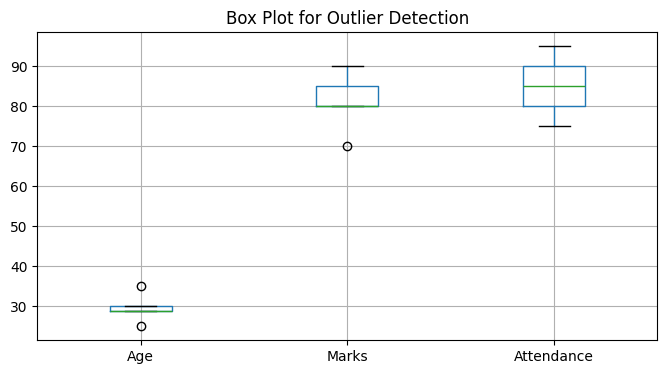


Outliers detected:
Empty DataFrame
Columns: [Name, Age, Marks, Attendance, Passed]
Index: []


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with missing values and duplicates
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Alice"],
    "Age": [25, np.nan, 30, 35, np.nan, 25],
    "Marks": [80, 90, np.nan, 70, 85, 80],
    "Attendance": [np.nan, 95, 80, 75, 90, np.nan],
    "Passed": ["Yes", "No", "Yes", np.nan, "Yes", "Yes"]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Identifying missing values
print("\nMissing values count:")
print(df.isnull().sum())

# Removing rows with missing values
df_cleaned = df.dropna()
print("\nDataFrame after dropping missing values:")
print(df_cleaned)

# Filling missing values
# Numerical columns
df = df.assign(
    Age=df["Age"].fillna(df["Age"].mean()),
    Marks=df["Marks"].fillna(df["Marks"].median()),
    Attendance=df["Attendance"].fillna(df["Attendance"].mean()),
    Passed=df["Passed"].fillna(df["Passed"].mode()[0])
)

print("\nDataFrame after filling missing values:")
print(df)

# Removing duplicate rows
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
print(df)

# Detecting outliers using Box Plot
plt.figure(figsize=(8, 4))
df.boxplot(column=["Age", "Marks", "Attendance"])
plt.title("Box Plot for Outlier Detection")
plt.show()

# Detecting outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print("\nOutliers detected:")
print(df[outliers])

2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Creating a sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Marks": [85, 78, 92, 60, 75],
    "Attendance": [90, 80, 85, 70, 75],
    "Passed": ["Yes", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)
# Standardization (Mean = 0, Standard Deviation = 1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])

print("Dataset after Standard Scaling:\n", df_scaled)

# Normalization (Values between 0 and 1)
scaler = MinMaxScaler()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])

Original Dataset:
       Name  Marks  Attendance Passed
0    Alice     85          90    Yes
1      Bob     78          80     No
2  Charlie     92          85    Yes
3    David     60          70     No
4      Eve     75          75    Yes
Dataset after Standard Scaling:
       Name     Marks  Attendance Passed
0    Alice  0.651057    1.414214    Yes
1      Bob  0.000000    0.000000     No
2  Charlie  1.302114    0.707107    Yes
3    David -1.674147   -1.414214     No
4      Eve -0.279024   -0.707107    Yes


3

In [ ]:
import pandas as pd
import numpy as np
# Creating a sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Marks": [85, 78, 92, 60, 75],
    "Age": [19, 22, 20, 24, 21]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)
# Define function to categorize performance based on marks
def performance_category(marks):
    if marks >= 85:
        return "High"
    elif marks >= 70:
        return "Medium"
    else:
        return "Low"

# Apply function to create new column
df["Performance"] = df["Marks"].apply(performance_category)

print("Dataset after Performance Category:\n", df)
# Creating Age Groups using binning
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 21, 24, 27], labels=["Young", "Adult", "Senior"])

print("Dataset after Age Grouping:\n", df)

Original Dataset:
       Name  Marks  Age
0    Alice     85   19
1      Bob     78   22
2  Charlie     92   20
3    David     60   24
4      Eve     75   21
Dataset after Performance Category:
       Name  Marks  Age Performance
0    Alice     85   19        High
1      Bob     78   22      Medium
2  Charlie     92   20        High
3    David     60   24         Low
4      Eve     75   21      Medium
Dataset after Age Grouping:
       Name  Marks  Age Performance Age_Group
0    Alice     85   19        High     Young
1      Bob     78   22      Medium     Adult
2  Charlie     92   20        High     Young
3    David     60   24         Low     Adult
4      Eve     75   21      Medium     Young
